In [16]:
# Install dependencies if needed
# !pip install pandas matplotlib python-docx openpyxl
# dependencies are in sph

In [17]:
import pandas as pd
from pandas.plotting import table
from matplotlib import pyplot as plt
from docx import Document
from docx.shared import Inches
from docx.enum.table import WD_TABLE_ALIGNMENT

In [18]:
# Create document and sample text
document = Document()
document.add_heading('Sample Report', 0)

In [19]:
# Add introduction section
document.add_heading('Introduction', level=1)
para1 = "I'm baby microdosing fashion axe biodiesel chillwave bitters. Same marfa poutine, ennui forage single-origin coffee enamel pin lyft. Blog cray fam adaptogen grailed venmo bicycle rights narwhal keytar semiotics farm-to-table bodega boys."
para2 = "Poutine banh mi brooklyn, 90's four loko sartorial. Poke humblebrag tumeric, banh mi thundercats ennui. Tofu irony sustainable, 8-bit whatever jean shorts. Poke chillwave tumeric, 90's four loko sartorial."
document.add_paragraph(para1)
document.add_paragraph(para2)

In [20]:
# Add Budget Data section
document.add_heading('Budget Data', level=1)
data = pd.read_excel('budget.xlsx')
table = document.add_table(rows=1, cols=len(data.columns))
table.style = 'Table Grid'

In [ ]:
# Check the data structure
print(data.head())

                  Task  Budgeted   Spent  Remaining
0  1. Project planning     20000   15000       5000
1    2. Implementation    150000   86499      63501
2        3. Monitoring     50000   10000      40000
3         4. Reporting     15000    2000      13000
4               TOTALS    235000  113499     121501


In [22]:
# Add header row with bold formatting
hdr_cells = table.rows[0].cells
for i, column_name in enumerate(data.columns):
    hdr_cells[i].text = column_name
    # Make header text bold
    for paragraph in hdr_cells[i].paragraphs:
        for run in paragraph.runs:
            run.bold = True

In [23]:
# Add data rows
for i in range(len(data)):
    row_cells = table.add_row().cells
    for j in range(len(data.columns)):
        row_cells[j].text = str(data.iloc[i, j])

In [24]:
# Add Key Points section
document.add_heading('Key Points', level=1)
document.add_paragraph('Bullet point one', style='List Bullet')
document.add_paragraph('Bullet point two', style='List Bullet')
document.add_paragraph('Bullet point three', style='List Bullet')

In [25]:
# Add Key Points section
key_points_heading = document.add_heading('Key Points', level=1)

# Add bullet points using proper Word formatting
bullets = document.add_paragraph('Bullet point one', style='List Bullet')
document.add_paragraph('Bullet point two', style='List Bullet')
document.add_paragraph('Bullet point three', style='List Bullet')

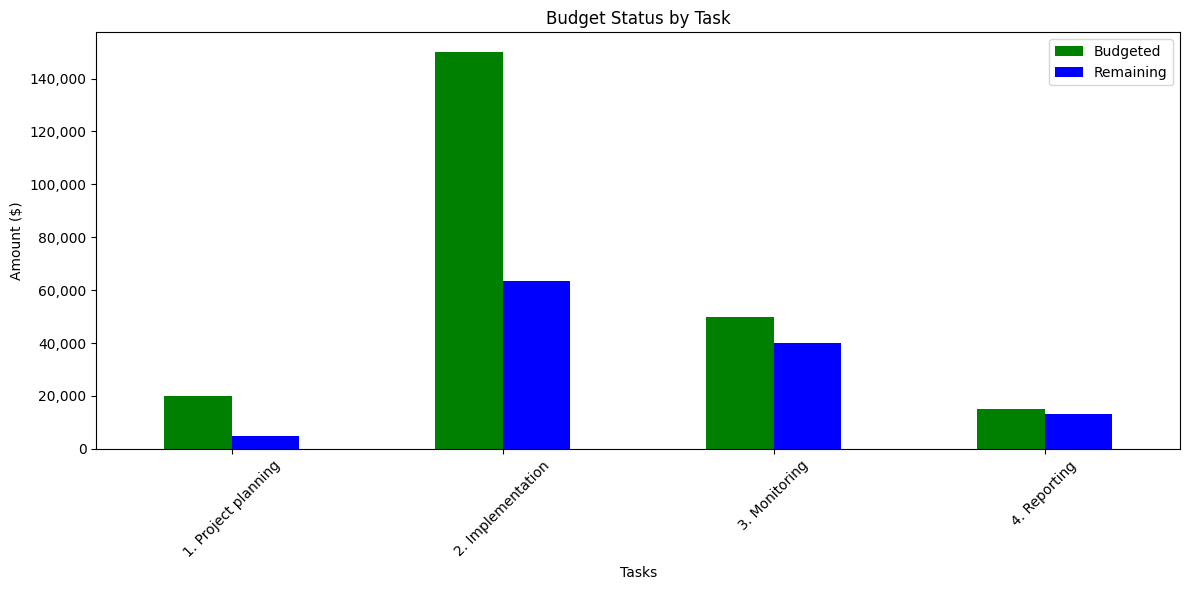

In [26]:
# Add Chart section
chart_heading = document.add_heading('Budget Visualization', level=1)

# Add a grouped bar chart (side by side)
# Filter out the TOTALS row for better visualization
chart_data = data[data['Task'] != 'TOTALS']

# Create grouped bar chart with custom colors
ax = chart_data.plot(kind='bar',
    x='Task',
    y=['Budgeted', 'Remaining'],
    stacked=False,  # This creates side-by-side bars instead of stacked
    color=['green', 'blue'],
    figsize=(12, 6))

plt.title('Budget Status by Task')
plt.xlabel('Tasks')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend(['Budgeted', 'Remaining'])

# Format y-axis with thousands separators (commas) but no dollar signs
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.savefig('chart.png', bbox_inches='tight', dpi=300)
document.add_picture('chart.png', width=Inches(6.0))
plt.show()

In [ ]:
# Save the document
document.save('report1.docx')
print("Report generated successfully!")

Report generated successfully!
